In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib

  Using cached tensorflow-2.4.1-cp37-cp37m-win_amd64.whl (370.7 MB)
     -------------------------------------- 370.7/370.7 MB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.5/2.5 MB 11.4 MB/s eta 0:00:00
     ------------------------------------- 462.0/462.0 kB 14.6 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 13.2 MB/s eta 0:00:00
     --------------------------------------- 13.2/13.2 MB 13.1 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\vaibh\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\~arkupsafe\\_speedups.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




     ---------------------------------------- 93.3/93.3 kB 5.5 MB/s eta 0:00:00
     ------------------------------------- 232.7/232.7 kB 13.9 MB/s eta 0:00:00
     ------------------------------------- 781.3/781.3 kB 16.4 MB/s eta 0:00:00
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=4259278a2be44469087494a334e8fce729e80f9c9a8ba460d09eb4237d70761d
  Stored in directory: c:\users\vaibh\appdata\local\pip\cache\wheels\19\b5\5e\dde0eb16713e5c2e7d5fc48df6c6d70cc85a7d665a7cdc399e
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19553 sha256=c67d4d9db4b5746fb1f334d3b87d83c2c53b04ee0efb9bc485c250327c397236
  Stored in directory: c:\users\vaibh\appdata\local\pip\cache\wheels\70\32\b7\c7efd67541df013b25b28029490a3d406b617e429923a26c72
Successfully built termcolor wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.0.1
    Uninstalling typing_extensions-4.0.1:
      Successfully un

In [11]:
!pip install tensorflow-gpu==2.4.1

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\vaibh\\appdata\\local\\programs\\python\\python37\\Lib\\site-packages\\tensorflow\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Consider using the `--user` option or check the permissions.




  Using cached tensorflow_gpu-2.4.1-cp37-cp37m-win_amd64.whl (370.7 MB)


In [1]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#importing tensorflow dependencies - functional api
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [7]:
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\positive'

In [8]:
# http://vis-www.cs.umass.edu/lfw/

In [5]:
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'lfw'

In [6]:
# Import uuid library to generate unique image names
import uuid

In [7]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\fd744d9c-6e13-11ed-85c1-99f35a8f35ee.jpg'

In [10]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

TypeError: 'NoneType' object is not subscriptable

In [20]:
plt.imshow(frame[120:120+250,200:200+250, :])

NameError: name 'frame' is not defined

In [8]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)

In [9]:
dir_test = anchor.as_numpy_iterator()

In [10]:
print(dir_test.next())

b'data\\anchor\\6013a3d8-6caf-11ed-83a4-99f35a8f35ee.jpg'


In [11]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0
    
    # Return image
    return img

In [12]:
img = preprocess('data\\anchor\\308dcdf4-6caf-11ed-ab27-99f35a8f35ee.jpg')

In [13]:
img.numpy().max()

0.99509805

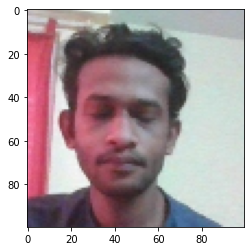

In [14]:
plt.imshow(img)

In [15]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [16]:
samples = data.as_numpy_iterator()

In [17]:
exampple = samples.next()

In [18]:
exampple

(b'data\\anchor\\281b8ad0-6caf-11ed-9029-99f35a8f35ee.jpg',
 b'data\\positive\\8e9a2b5c-6caf-11ed-af21-99f35a8f35ee.jpg',
 1.0)

In [19]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [20]:
res = preprocess_twin(*exampple)

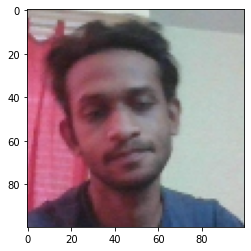

In [21]:
plt.imshow(res[1])

In [22]:
res[2]

1.0

In [23]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [24]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [25]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [26]:
inp = Input(shape=(100,100,3), name='input_image')

In [27]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [28]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [29]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [30]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [31]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [32]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [33]:
mod.summary()

Model: "embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 91, 91, 64)        19264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 128)       401536    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 128)       262272    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0 

In [34]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [35]:
embedding = make_embedding()

In [36]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 91, 91, 64)        19264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 40, 40, 128)       401536    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 128)       262272    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 128)         0 

In [37]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [38]:
l1 = L1Dist()

In [39]:
l1(anchor_embedding, validation_embedding)

NameError: name 'anchor_embedding' is not defined

In [40]:

input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [41]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [42]:
siamese_layer = L1Dist()

In [43]:
distances = siamese_layer(inp_embedding, val_embedding)

In [44]:
classifier = Dense(1, activation='sigmoid')(distances)

In [45]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [46]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [47]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38960448    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
l1_dist_1 (L1Dist)              (None, 4096)         0           embedding[0][0]     

In [48]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [49]:
siamese_model = make_siamese_model()

In [50]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38960448    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
distance (L1Dist)               (None, 4096)         0           embedding[2][0]     

In [51]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [52]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

In [53]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [54]:
test_batch = train_data.as_numpy_iterator()

In [55]:
batch_1 = test_batch.next()

In [56]:
X = batch_1[:2]

In [57]:
y = batch_1[2]

In [58]:
y

array([0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.],
      dtype=float32)

In [59]:
tf.losses.BinaryCrossentropy??

In [60]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    # Return loss
    return loss

In [61]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            train_step(batch)
            progbar.update(idx+1)
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [63]:
EPOCHS = 20

In [64]:
train(train_data, EPOCHS)


 Epoch 1/20
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
25/25 [==============================] - 491s 20s/step

 Epoch 2/20
25/25 [==============================] - 639s 26s/step

 Epoch 3/20
25/25 [==============================] - 705s 28s/step

 Epoch 4/20
25/25 [==============================] - 607s 24s/step

 Epoch 5/20
25/25 [==============================] - 492s 20s/step

 Epoch 6/20
25/25 [==============================] - 474s 19s/step

 Epoch 7/20
25/25 [==============================] - 469s 19s/step

 Epoch 8/20
25/25 [==============================] - 449s 18s/step

 Epoch 9/20
25/25 [==============================] - 449s 18s/step

 Epoch 10/20
25/25 [==============================] - 476s 19s/step

 Epoch 11/20
25/25 [==============================] - 460s 18s/step

 Epoch 12/20
25/25 [==============================] - 520s 21s/step

 Epoch 13/20
25/25 [======

In [65]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [66]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [67]:
# Make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

array([[2.8391804e-07],
       [2.0340849e-09],
       [1.0000000e+00],
       [1.0000000e+00],
       [6.3080108e-10],
       [5.9061385e-06],
       [1.6515315e-08],
       [8.2537283e-10],
       [2.1899558e-09],
       [8.1896068e-10],
       [8.6558947e-09],
       [9.9999964e-01],
       [2.0149081e-10],
       [3.7076658e-10],
       [2.0476652e-10],
       [9.9998909e-01]], dtype=float32)

In [68]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]

In [69]:
y_true

array([0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
      dtype=float32)

In [70]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [71]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [72]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1.0 1.0


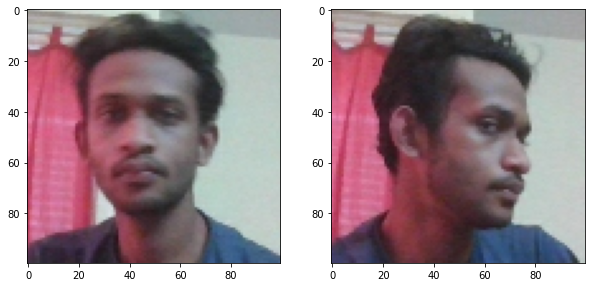

In [74]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

In [75]:
# Save weights
siamese_model.save('siamesemodel.h5')

In [76]:
L1Dist

__main__.L1Dist

In [77]:
# Reload model 
model = tf.keras.models.load_model('siamesemodel.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [78]:
# Make predictions with reloaded model
model.predict([test_input, test_val])

array([[9.9993420e-01],
       [7.6967190e-08],
       [3.9988225e-07],
       [9.9973512e-01],
       [1.1360096e-07],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [79]:
# View model summary
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38960448    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
l1_dist_3 (L1Dist)              (None, 4096)         0           embedding[0][0]     

In [87]:
application_data\verification_images

SyntaxError: unexpected character after line continuation character (2818603333.py, line 1)

In [80]:
os.listdir(os.path.join('application_data', 'verification_images'))

['6ec6f512-6caf-11ed-8f90-99f35a8f35ee.jpg',
 '6f1c57f6-6caf-11ed-8ac6-99f35a8f35ee.jpg',
 '6f54e724-6caf-11ed-92f5-99f35a8f35ee.jpg',
 '6f7197b4-6caf-11ed-b399-99f35a8f35ee.jpg',
 '6f8006a8-6caf-11ed-93fa-99f35a8f35ee.jpg',
 '6fb68ecc-6caf-11ed-ad2f-99f35a8f35ee.jpg',
 '6fc4e9ee-6caf-11ed-af34-99f35a8f35ee.jpg',
 '6fcbf910-6caf-11ed-bbd4-99f35a8f35ee.jpg',
 '7a1b6a74-6caf-11ed-84d3-99f35a8f35ee.jpg',
 '7ab7f058-6caf-11ed-8068-99f35a8f35ee.jpg',
 '7b0649e4-6caf-11ed-b758-99f35a8f35ee.jpg',
 '7b2c79e4-6caf-11ed-8b11-99f35a8f35ee.jpg',
 '7b338b42-6caf-11ed-8bb2-99f35a8f35ee.jpg',
 '7b5e00cc-6caf-11ed-8bd5-99f35a8f35ee.jpg',
 '7b73863a-6caf-11ed-b57a-99f35a8f35ee.jpg',
 '7b901198-6caf-11ed-a486-99f35a8f35ee.jpg',
 '7ba515da-6caf-11ed-86ca-99f35a8f35ee.jpg',
 '7e2fda4a-6caf-11ed-a52d-99f35a8f35ee.jpg',
 '7f18faee-6caf-11ed-b1db-99f35a8f35ee.jpg',
 '7f3f9c50-6caf-11ed-84cc-99f35a8f35ee.jpg',
 '7f52a2a6-6caf-11ed-8a68-99f35a8f35ee.jpg',
 '8cb8e1fa-6caf-11ed-9b4f-99f35a8f35ee.jpg',
 '8cbff6e8

In [81]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data\\input_image\\input_image.jpg'

In [82]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data\verification_images\6ec6f512-6caf-11ed-8f90-99f35a8f35ee.jpg
application_data\verification_images\6f1c57f6-6caf-11ed-8ac6-99f35a8f35ee.jpg
application_data\verification_images\6f54e724-6caf-11ed-92f5-99f35a8f35ee.jpg
application_data\verification_images\6f7197b4-6caf-11ed-b399-99f35a8f35ee.jpg
application_data\verification_images\6f8006a8-6caf-11ed-93fa-99f35a8f35ee.jpg
application_data\verification_images\6fb68ecc-6caf-11ed-ad2f-99f35a8f35ee.jpg
application_data\verification_images\6fc4e9ee-6caf-11ed-af34-99f35a8f35ee.jpg
application_data\verification_images\6fcbf910-6caf-11ed-bbd4-99f35a8f35ee.jpg
application_data\verification_images\7a1b6a74-6caf-11ed-84d3-99f35a8f35ee.jpg
application_data\verification_images\7ab7f058-6caf-11ed-8068-99f35a8f35ee.jpg
application_data\verification_images\7b0649e4-6caf-11ed-b758-99f35a8f35ee.jpg
application_data\verification_images\7b2c79e4-6caf-11ed-8b11-99f35a8f35ee.jpg
application_data\verification_images\7b338b42-6caf-11ed-8bb2-99f

In [83]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

In [85]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
#         hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#         h, s, v = cv2.split(hsv)

#         lim = 255 - 10
#         v[v > lim] = 255
#         v[v <= lim] -= 10
        
#         final_hsv = cv2.merge((h, s, v))
#         img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(siamese_model, 0.9, 0.5)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

TypeError: 'NoneType' object is not subscriptable

In [18]:
np.sum(np.squeeze(results) > 0.9)

NameError: name 'results' is not defined

In [ ]:
32/50